# Total Public Revenue

## Introdução

O **Total Public Revenue** é um dos pilares centrais para o funcionamento de qualquer governo, representando a soma de todas as receitas geradas pelo setor público através de impostos, taxas, tarifas, lucros de empresas estatais e outras fontes. Esse indicador é crucial porque não apenas reflete a capacidade de um governo em financiar seus serviços e programas, mas também serve como um termômetro para a saúde fiscal de uma nação.

<br>

A análise do indicador **Total Public Revenue** pode fornecer insights valiosos sobre a eficiência das políticas tributárias, o grau de dependência de diferentes fontes de receita, e a equidade na distribuição de encargos financeiros entre diferentes segmentos da população. Um aumento ou queda significativa nesse indicador pode indicar alterações na economia local ou global, mudanças em políticas fiscais, ou mesmo crises que afetam o poder arrecadatório do Estado. 

<br>

Nos atentarmos a este indicador é essencial para entender a sustentabilidade das políticas públicas, a capacidade de um país em cumprir suas obrigações sociais e econômicas, além de nos alertar sobre potenciais desequilíbrios que podem culminar em déficits fiscais e crises financeiras. Portanto, o **Total Public Revenue** não é apenas um reflexo do dinheiro em caixa de um governo, mas um indicador-chave para a estabilidade e desenvolvimento de qualquer nação.

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/Users/yari/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Lendo o arquivo tratado

In [2]:
df = pd.read_csv('combined_WID_cleaned.csv')
df.head()

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
0,p0p100,1917,1168229.0,New Jersey,Population,Population,tax unit,Adults,population
1,p0p100,1918,1178440.0,New Jersey,Population,Population,tax unit,Adults,population
2,p0p100,1919,1204412.0,New Jersey,Population,Population,tax unit,Adults,population
3,p0p100,1920,1238146.0,New Jersey,Population,Population,tax unit,Adults,population
4,p0p100,1921,1279734.0,New Jersey,Population,Population,tax unit,Adults,population


Filtrando os resultados para:

- indicador  = Total Public Revenue

- tipo = Wealth-income ratio

In [3]:
df_rev = df[(df['indicador'] == 'Total Public Revenue') & (df['tipo'] == 'Wealth-income ratio')]

In [4]:
df_rev['tipo'].unique()

array(['Wealth-income ratio'], dtype=object)

In [5]:
df_rev['idade'].unique()

array(['All Ages'], dtype=object)

In [6]:
df_rev['unidade'].unique()

array(['% of national income', nan], dtype=object)

## 1 - Comparando todos os paises

In [7]:
fig = px.line(df_rev, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Total Public Revenue",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()

## 2 - Top 10 paises com as maiores receitas totais comparados com o Brasil

In [8]:
df_rev_pivot = df_rev.pivot_table(index='pais', values='valor', aggfunc='median')
df_rev_ordered = df_rev_pivot.sort_values(by='valor', ascending=False)
df_rev_ordered

,valor
pais,
Monaco,0.772731
Denmark,0.660120
Norway,0.650087
Sweden,0.638467
Finland,0.634261
...,...
Gambia,0.089805
Sierra Leone,0.087020
Lao PDR,0.083861


In [9]:
brazil_rev_df = df_rev_ordered.query("pais == 'Brazil'")

top_10_rev_df = df_rev_ordered.head(10)

result_rev_df = pd.concat([brazil_rev_df, top_10_rev_df]).drop_duplicates()

result_rev_df

,valor
pais,
Brazil,0.437545
Monaco,0.772731
Denmark,0.660120
Norway,0.650087
Sweden,0.638467
Finland,0.634261
Austria,0.595425
Hungary,0.592119
Belgium,0.568868


In [10]:
country_name_list = list(result_rev_df.index)
country_name_list

['Brazil',
 'Monaco',
 'Denmark',
 'Norway',
 'Sweden',
 'Finland',
 'Austria',
 'Hungary',
 'Belgium',
 'France',
 'Slovenia']

In [11]:
df_rev_filtered = df_rev.query(f'pais in {country_name_list}')
df_rev_filtered

,percentil,ano,valor,pais,indicador,tipo,populacao,idade,unidade
8193449,p0p100,1980,0.538434,Belgium,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
8193450,p0p100,1981,0.546079,Belgium,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
8193451,p0p100,1982,0.555786,Belgium,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
8193452,p0p100,1983,0.563522,Belgium,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
8193453,p0p100,1984,0.568937,Belgium,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
...,...,...,...,...,...,...,...,...,...
48226274,p0p100,2019,0.599980,Austria,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
48226275,p0p100,2020,0.597902,Austria,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
48226276,p0p100,2021,0.607604,Austria,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income
48226277,p0p100,2022,0.605622,Austria,Total Public Revenue,Wealth-income ratio,individuals,All Ages,% of national income


In [12]:
fig = px.line(df_rev_filtered, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Top 10 paises com maiores receitas totais",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


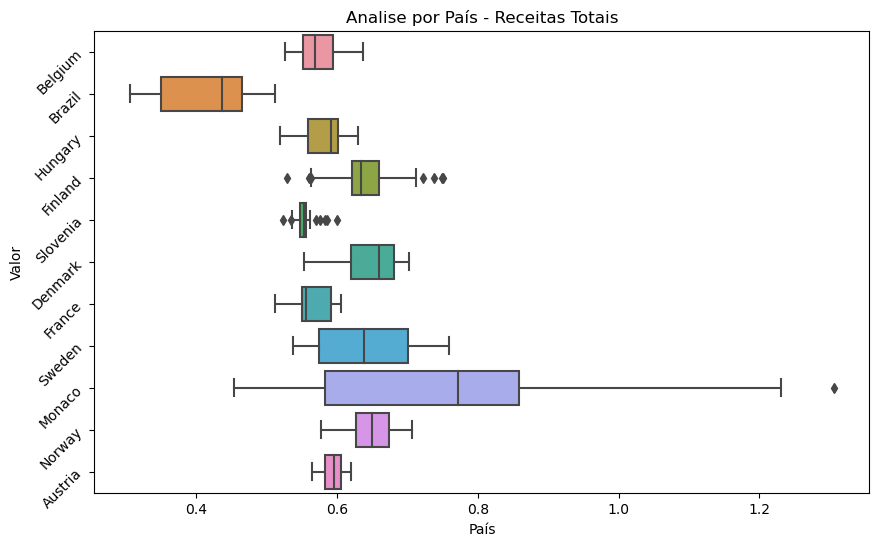

In [13]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_rev_filtered)

plt.yticks(rotation=45)

plt.title('Analise por País - Receitas Totais')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

## 3 - Filtrando por alguns paises em espeficico

In [14]:
paises = ['Brazil', 'China', 'France', 'the USA', 'Canada', 'Japan', 'Monaco', 'Mexico', 'Australia', 'India', 'Sweden', 'Finland']

In [15]:
df_paises_espec = df_rev.query(f'pais in {paises}')
df_paises_espec['pais'].unique()

array(['Mexico', 'Canada', 'Brazil', 'Finland', 'India', 'France',
       'Japan', 'Sweden', 'China', 'the USA', 'Monaco', 'Australia'],
      dtype=object)

In [16]:
fig = px.line(df_paises_espec, 
              x='ano', 
              y='valor', 
              color='pais', 
              title="Receitas Totais - Comparativo entre Países",
              labels={
                  "valor": "% of national income",
                  "ano": "Ano",
                  "pais": "País"
              })

fig.show()


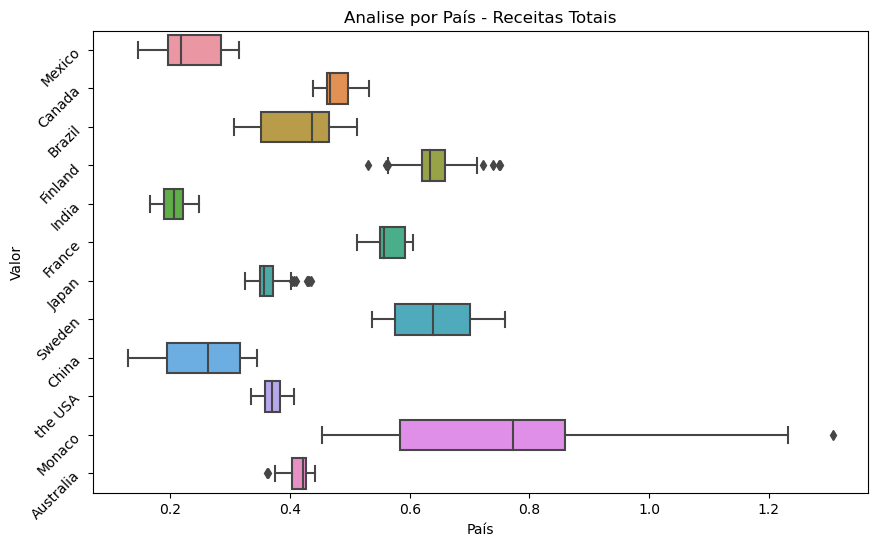

In [17]:
plt.figure(figsize=(10, 6))  
sns.boxplot(y='pais', x='valor', data=df_paises_espec)

plt.yticks(rotation=45)

plt.title('Analise por País - Receitas Totais')
plt.xlabel('País')
plt.ylabel('Valor')

plt.show()

# Conclusão

A análise das receitas públicas totais dos países revela tendências que refletem tanto o desenvolvimento econômico quanto os modelos de governança adotados. No topo do ranking, encontramos países europeus como Mônaco, Dinamarca e Noruega, conhecidos por seus sistemas robustos de bem-estar social e altos níveis de renda per capita. Historicamente, essas nações têm investido em políticas sociais inclusivas, resultando em sistemas de arrecadação eficientes, com uma população que confia na redistribuição de recursos e em serviços públicos de qualidade.

<br>

Países como Suécia e Finlândia, por exemplo, adotam modelos de economia de mercado altamente regulados, onde o Estado desempenha um papel central na promoção do bem-estar e na mitigação de desigualdades, garantindo segurança social por meio de arrecadação substancial. Além disso, a estabilidade política e a transparência governamental nessas regiões facilitam a manutenção de um ambiente propício para o crescimento sustentável.

<br>

Na comparação com países como Brasil, observa-se um contexto distinto. O Brasil, sendo uma economia emergente e geograficamente vasto, enfrenta desafios que incluem a gestão de uma população numerosa e desigualdades regionais profundas. Apesar de uma base industrial e agrícola forte, o sistema de arrecadação brasileiro ainda não atingiu o nível de eficiência observado nas nações do topo da lista, refletindo um histórico de instabilidade econômica e complexidade tributária.

<br>

Esses fatores tornam evidente que as receitas públicas totais estão intrinsecamente ligadas à capacidade institucional de cada país, bem como à sua trajetória histórica e características econômicas. 

**Referencia:**<br>

a - https://data.worldbank.org/ 